# 05_测试网络

In [345]:
# 计算模块
import numpy as np
# 特殊公式模块
import scipy.special as sp

In [346]:
# 随机权重矩阵
def random_weight_matrix(len1, len2):
    # 正态分布
    return np.random.normal(0.0, pow(len1, -0.5), (len1, len2))

# 转为矩阵
def convert_matrix(list):
    return np.array(list, ndmin=2).T

# 计算操作
def output_calc(weight, input, activation_fn):
    return activation_fn(np.dot(weight, input))

In [347]:
class neuralNetwork:
    # 初始化神经网络
    def __init__(self, nodes_info, learning_grate):
        # 输入层、隐藏层、输出层
        self.nodes_input = nodes_info['input']
        self.nodes_hide = nodes_info['hide']
        self.nodes_output = nodes_info['output']

        # 学习率
        self.lr = learning_grate

        # 输入层与隐藏层之间的权重矩阵
        self.w_ih = random_weight_matrix(self.nodes_hide, self.nodes_input)
        # 隐藏层与输出层之间的权重矩阵
        self.w_ho = random_weight_matrix(self.nodes_output, self.nodes_hide)

		# 激活函数（sigmoid）
        self.activation_fn = lambda x: sp.expit(x)
        
        # 空哈希值
        self.hash_val = ''

    # 训练神经网络
    def train(self, input_list, target_list):
        input = convert_matrix(input_list)
        target = convert_matrix(target_list)

        # input = convert_matrix(input_list)
        self.calc_input(input_list)

        # 算出误差（目标 - 结果）
        # 输出层误差
        output_error = target - self.final_output
        # 隐藏层误差
        hidden_error = np.dot(self.w_ho.T, output_error)

        # 通过误差修改
        self.w_ho += self.lr * np.dot((output_error * self.final_output * (1 - self.final_output)), np.transpose(self.hidden_output))
        self.w_ih += self.lr * np.dot((hidden_error * self.hidden_output * (1 - self.hidden_output)), np.transpose(input))

    # 查询神经网络
    def query(self, input_list):
        # 将输入数组转为矩阵
        # input = convert_matrix(input_list)
        self.calc_input(input_list)

        return self.final_output
    
    # 定义计算隐藏层、输出层值函数
    # 通过内置的哈希校验判断输入是否相同，如果相同，则不计算
    def calc_input(self, input_list):
        hash_val = hash(''.join(str(i) for i in input_list))
        if self.hash_val != hash_val:
            self.hash_val = hash_val
            self.hidden_output = output_calc(self.w_ih, convert_matrix(input_list), self.activation_fn)
            self.final_output = output_calc(self.w_ho, self.hidden_output, self.activation_fn)

In [348]:
# 节点信息
neural_node_info = {
    'input': 784,
    'hide': 200,
    'output': 10
}
# 学习率
learning_grate = 0.7

In [349]:
# 实例化一个神经网络对象
example = neuralNetwork(neural_node_info, learning_grate)
# 以列表载入mnist训练数据集文件内容
with open('mnist_dataset/pjreddie/mnist_train.csv', 'r') as training_data_file:
# with open('mnist_dataset/mini/mnist_train_100.csv', 'r') as training_data_file:
    training_data_list = training_data_file.readlines()

# 遍历训练数据集中的所有记录
for record in training_data_list:
    # 用逗号分隔记录
    all_values = record.split(',')
    # 转换输入
    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99 + 0.01)
    # 设定目标值
    targets = np.zeros(neural_node_info['output']) + 0.01
    # all_values[0] 就是此记录的目标
    targets[int(all_values[0])] = 0.99
    
    example.train(inputs, targets)

因为训练数据大小为28*28，所以有784个输入节点
选择100个隐藏层节点强制网络尝试总结输入的主要特点，如果过少会限制网络的能力，使其难以找到足够的特征或模式

> 对于应该选择多少个隐藏层节点，并不存在一个最佳方法。
>
> 最好的办法还是实验

## 获取测试数据

In [350]:
# 以数组存储测试数据
# with open('mnist_dataset/mini/mnist_test_10.csv') as test_data_file:
with open('mnist_dataset/pjreddie/mnist_test.csv') as test_data_file:
    test_data_list = test_data_file.readlines()

all_values = test_data_list[0].split(',')
print('测试目标为: ', all_values[0])

测试目标为:  7


In [351]:
fin_out = example.query((np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01)
print(fin_out)

[[3.84042117e-03]
 [2.76142650e-03]
 [4.95135829e-04]
 [6.57667702e-05]
 [5.51535996e-07]
 [6.28867906e-04]
 [7.89816893e-04]
 [9.99853490e-01]
 [6.79830858e-04]
 [1.26323085e-04]]


In [352]:
# 添加计分板
scorecard = []

for record in test_data_list:
    all_values = record.split(',')

    correct_label = int(all_values[0])
    print(f'目标值: {correct_label}')

    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01

    # 学习成果
    output = example.query(inputs)

    # 得出最大值
    label = np.argmax(output)
    print(f'实际值: {label}')

    # 如果成功算出则加1，反之加0
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

print(scorecard)

目标值: 7
实际值: 7
目标值: 2
实际值: 2
目标值: 1
实际值: 1
目标值: 0
实际值: 0
目标值: 4
实际值: 4
目标值: 1
实际值: 1
目标值: 4
实际值: 4
目标值: 9
实际值: 9
目标值: 5
实际值: 6
目标值: 9
实际值: 9
目标值: 0
实际值: 0
目标值: 6
实际值: 6
目标值: 9
实际值: 9
目标值: 0
实际值: 0
目标值: 1
实际值: 1
目标值: 5
实际值: 5
目标值: 9
实际值: 9
目标值: 7
实际值: 7
目标值: 3
实际值: 3
目标值: 4
实际值: 4
目标值: 9
实际值: 9
目标值: 6
实际值: 6
目标值: 6
实际值: 6
目标值: 5
实际值: 5
目标值: 4
实际值: 4
目标值: 0
实际值: 0
目标值: 7
实际值: 7
目标值: 4
实际值: 4
目标值: 0
实际值: 0
目标值: 1
实际值: 1
目标值: 3
实际值: 3
目标值: 1
实际值: 1
目标值: 3
实际值: 3
目标值: 4
实际值: 6
目标值: 7
实际值: 7
目标值: 2
实际值: 2
目标值: 7
实际值: 7
目标值: 1
实际值: 1
目标值: 2
实际值: 2
目标值: 1
实际值: 1
目标值: 1
实际值: 1
目标值: 7
实际值: 7
目标值: 4
实际值: 4
目标值: 2
实际值: 2
目标值: 3
实际值: 3
目标值: 5
实际值: 5
目标值: 1
实际值: 3
目标值: 2
实际值: 2
目标值: 4
实际值: 9
目标值: 4
实际值: 4
目标值: 6
实际值: 6
目标值: 3
实际值: 3
目标值: 5
实际值: 5
目标值: 5
实际值: 5
目标值: 6
实际值: 6
目标值: 0
实际值: 0
目标值: 4
实际值: 4
目标值: 1
实际值: 1
目标值: 9
实际值: 9
目标值: 5
实际值: 5
目标值: 7
实际值: 7
目标值: 8
实际值: 8
目标值: 9
实际值: 9
目标值: 3
实际值: 3
目标值: 7
实际值: 7
目标值: 4
实际值: 3
目标值: 6
实际值: 6
目标值: 4
实际值: 4
目标值: 3
实际值: 3
目标值: 0
实际值: 0
目标值: 7
实际值: 7
目标值: 0

In [353]:
scorecard_arr = np.asarray(scorecard)
print(f'得分: {scorecard_arr.sum() / scorecard_arr.size}')

得分: 0.8922


学习率跟重复训练的次数会影响到最终的结果详见：
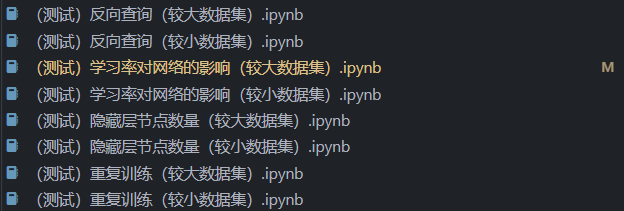
